# Spatial Analysis

Data expected is the processed TSDC data, stored in a csv

In [1]:
to_data_folder = "../Data" #data folder, where composite data was written from the TSDC_data file
to_boundary_folder = "../Data/muni_boundaries" #where municipality boundary files are published

In [2]:
# %conda install geopandas

If, when importing geopandas, you get the error `ImportError: libtiff.so.5: cannot open shared object file: No such file or directory` you can resolve it by running the command `apt install libtiff5` in the root of the notebook container, if using docker desktop, you can access a terminal from the container, else use `docker exec -it [container id] /bin/sh`. You might need to run `apt-get update` before you can perform the install. 

In [3]:
# Spatial Analysis
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import shapely as shp
from shapely.geometry import shape
from shapely.geometry import MultiPoint
from shapely.geometry import Point

def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str.replace("'", '"')))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

In [4]:
trip_program_df = pd.read_csv(to_data_folder + "/tsdc_filtered_merged_trips.csv") #issues here with the columns and data formatting when coming from the TSDC...

trip_program_df["distance_km"] = trip_program_df.distance / 1000

trip_program_df.sample(n=50, random_state=123)[["program", "perno", "_id", "data_start_fmt_time", "data_end_fmt_time", "distance_km", "Mode_confirm", "data_start_loc_coordinates"]]

/tmp/ipykernel_71/2875339355.py:1: DtypeWarning: Columns (3,77,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_program_df = pd.read_csv(to_data_folder + "/tsdc_filtered_merged_trips.csv") #issues here with the columns and data formatting when coming from the TSDC...


,program,perno,_id,data_start_fmt_time,data_end_fmt_time,distance_km,Mode_confirm,data_start_loc_coordinates
5077,cc,c7ce889c-796f-4e2a-8859-fa2d7d5068fe,637ac332989dff3b00f34b3f,2022-11-20T15:45:23.854975-07:00,2022-11-20T16:25:20.323000-07:00,5.532977,Shared Car,"[-106.3755611, 39.6424925]"
14417,cc,737ef849-4f26-407b-8b2a-6b1b1dc631a4,6186d5156f18f0f05cdffb3b,2021-11-06T11:26:10-06:00,2021-11-06T12:04:09-06:00,3.004424,Walk,"[-105.3143367, 40.0153921]"
20832,cc,8461560f-8b4a-4ca6-af2c-b569962dae32,623f404218556de961cdb600,2022-03-26T08:18:44.736872-07:00,2022-03-26T08:30:57.214000-07:00,2.805978,Shared Car,"[-118.3869361, 33.9481922]"
31975,fc,7347df5e-0ac9-4a10-9790-b31ba2e8a02a,61d6a58a402b29b449651cef,2022-01-06T00:11:37.682041-07:00,2022-01-06T00:17:47-07:00,0.292729,Walk,"[-105.0827036, 40.5739205]"
36466,fc,7347df5e-0ac9-4a10-9790-b31ba2e8a02a,62eef8e1d273a0d9c1769138,2022-08-06T16:21:09.996574-06:00,2022-08-06T16:26:51-06:00,0.393654,Walk,"[-104.8989744, 39.2281518]"
47712,pc,a35a1570-7e2a-4301-ac86-9ec3b5802f35,62a2482da6f197e2a6f17df2,2022-06-09T12:02:06.926591-06:00,2022-06-09T12:18:48.144000-06:00,8.379554,Shared Car,"[-104.6089739, 38.2773311]"
34101,fc,313d003d-f34b-4bd9-823b-3474fc93f9f9,625b0a794a7e6fa70db694aa,2022-04-16T11:59:08.022565-06:00,2022-04-16T12:15:34.995007-06:00,5.500992,Car,"[-105.08108991208027, 40.583556485400145]"
3331,cc,14fe8002-bbdc-4f97-acbd-1a00de241bf6,631c02819a13ab936f6c4cb3,2022-09-09T19:45:10.737969-06:00,2022-09-09T20:35:41.264542-06:00,42.356449,Shared Car,"[-105.24187313644548, 40.00595000928667]"
34810,fc,47b5d57b-d435-4276-bb6d-2dcd1438901d,627ababe3033b99b18cd5751,2022-05-10T12:18:40.648127-06:00,2022-05-10T12:29:23.140827-06:00,2.758757,Walk,"[-105.09300719338513, 40.57184306122411]"
57654,vail,8b1f3ba4-3de9-45be-a79d-e6a81716ad04,617ab523e1c12d585e845b5d,2021-10-28T07:40:59.467862-06:00,2021-10-28T07:50:44.131229-06:00,2.855258,Shared Car,"[-106.38943516125197, 39.650101688013464]"


In [5]:
#assemble the points
trip_program_df["start_loc"] = "{'type': 'Point', 'coordinates': " + trip_program_df['data_start_loc_coordinates'] + "}"
trip_program_df["end_loc"] = "{'type': 'Point', 'coordinates': " + trip_program_df['data_end_loc_coordinates'] + "}"

trip_program_df["start_loc"] = trip_program_df["start_loc"].apply(parse_geom)
trip_program_df["end_loc"] = trip_program_df["end_loc"].apply(parse_geom)
trip_program_df.head()

,Unnamed: 0.1,_id,perno,metadata_key,metadata_platform,metadata_write_ts,metadata_time_zone,metadata_write_local_dt_year,metadata_write_local_dt_month,metadata_write_local_dt_day,...,PINC,Mode,PINC_NUM,VEH_num,DRIVERS,DRIVERS_num,veh_per_driver,distance_km,start_loc,end_loc
0,226,613bf52b864145e75c721940,9910245f-ee4e-4cca-ab4c-dd2312eb0d5d,analysis/confirmed_trip,server,1.631319e+09,America/Los_Angeles,2021,9,10,...,$0-9,E-bike,6250.0,1,1,<bound method NDFrame.replace of 52 1\n54...,1.0,3.272850,POINT (-107.8743859 37.2823162),POINT (-107.8612555 37.2751879)
1,670,6142b6d64c0c0bd1c1f2b94f,9910245f-ee4e-4cca-ab4c-dd2312eb0d5d,analysis/confirmed_trip,server,1.631762e+09,America/Los_Angeles,2021,9,15,...,$0-9,E-bike,6250.0,1,1,<bound method NDFrame.replace of 52 1\n54...,1.0,4.078590,POINT (-107.8720135 37.2451211),POINT (-107.8612384 37.2752039)
2,948,613517a04c5e0b56207c9e75,e192b8a0-0b6c-4222-9685-1c93785deaf7,analysis/confirmed_trip,server,1.630869e+09,America/Los_Angeles,2021,9,5,...,$0-9,Shared Car,6250.0,1,2,<bound method NDFrame.replace of 52 1\n54...,0.5,1.780559,POINT (-107.8728417 37.2906917),POINT (-107.8669089 37.3047487)
3,1089,615750401e0d62e551327087,e192b8a0-0b6c-4222-9685-1c93785deaf7,analysis/confirmed_trip,server,1.633112e+09,America/Los_Angeles,2021,10,1,...,$0-9,Shared Car,6250.0,1,2,<bound method NDFrame.replace of 52 1\n54...,0.5,14.958661,POINT (-108.0134717 37.360485),POINT (-107.8510549 37.3227536)
4,1248,616214fa1004b01e83c6b064,9910245f-ee4e-4cca-ab4c-dd2312eb0d5d,analysis/confirmed_trip,server,1.633818e+09,America/Los_Angeles,2021,10,9,...,$0-9,Shared Car,6250.0,1,1,<bound method NDFrame.replace of 52 1\n54...,1.0,3.833651,POINT (-107.8613672 37.2751519),POINT (-107.8700134 37.2681743)


In [6]:
trip_program_df['start_end'] = trip_program_df.apply(lambda row: MultiPoint([row['start_loc'], row['end_loc']]), axis=1) #Create a multipoint column

trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="start_end")
trip_program_df_gdf.crs is None
trip_program_df_gdf = trip_program_df_gdf.set_crs(4269, allow_override=True)
trip_program_df_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Data Preparation

In [7]:
trip_program_df_gdf.rename(columns={"data_user_input_mode_confirm": "mode_confirm"}, inplace = True)

e_bike_trips = trip_program_df_gdf[trip_program_df_gdf.mode_confirm == 'pilot_ebike']
print(len(e_bike_trips), "ebike trips")

denver_boundary = gpd.read_file(to_boundary_folder + "/denver_uza_akcicek.shp")

e_bike_start_end_points = pd.concat([e_bike_trips.start_loc, e_bike_trips.end_loc]); 
print(len(e_bike_start_end_points))
e_bike_geo_start_end_points = gpd.GeoSeries(e_bike_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
e_bike_start_or_end_within = e_bike_geo_start_end_points[e_bike_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

17365 ebike trips
34730


In [8]:
car_like_trips = trip_program_df_gdf.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"')
print(len(car_like_trips))
car_like_start_end_points = pd.concat([car_like_trips.start_loc, car_like_trips.end_loc])

car_like_geo_start_end_points = gpd.GeoSeries(car_like_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
car_like_start_or_end_within = car_like_geo_start_end_points[car_like_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

30769


### preparing the boundaries

In [9]:
def prepare_boundary(filename):
    boundary = gpd.read_file(to_boundary_folder + filename)
    boundary.plot()
    return boundary

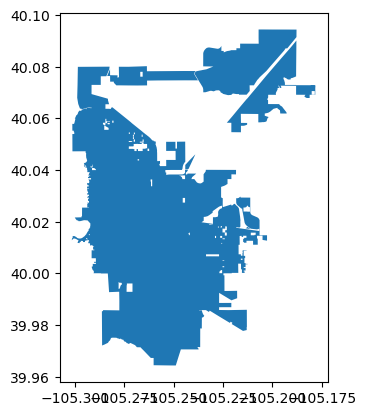

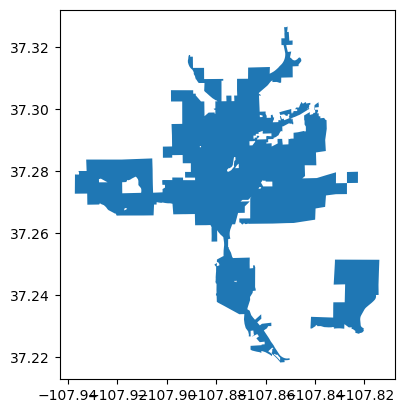

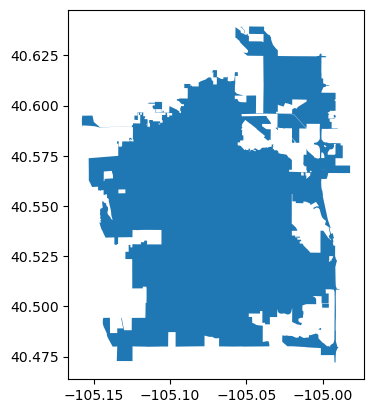

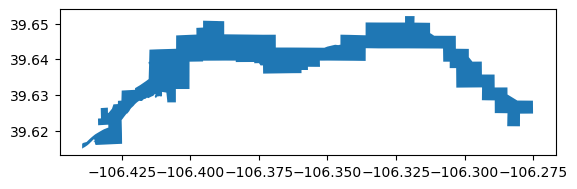

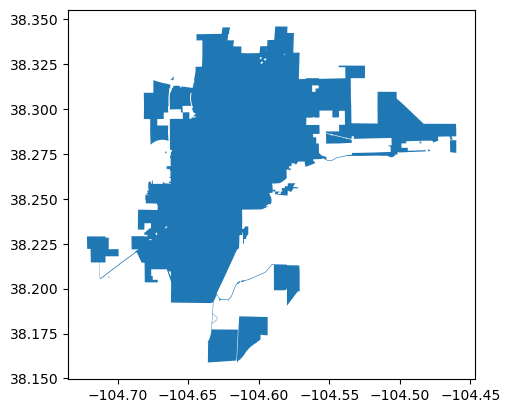

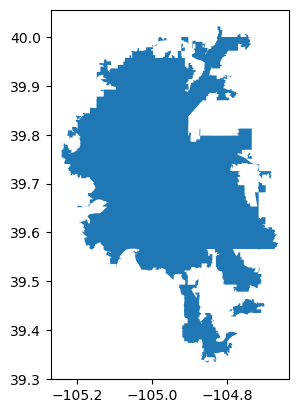

In [10]:
boulder_boundary = prepare_boundary("/boulder.shp")
durango_boundary = prepare_boundary("/durango.shp")
fort_collins_boundary = prepare_boundary("/fort_collins.shp")
vail_boundary = prepare_boundary("/vail.shp")
pueblo_boundary = prepare_boundary("/pueblo.shp")
denver_boundary = prepare_boundary("/denver_uza_akcicek.shp")

### gathering data within the boundaries

In [11]:
#denver is particular to smart commute - don't want to cloud with people who visited denver from other places
all_sc_within_denver = trip_program_df_gdf[(trip_program_df_gdf.within(denver_boundary.geometry.iloc[0])) & (trip_program_df_gdf.program == "sc")]

all_within_boulder = trip_program_df_gdf[trip_program_df_gdf.within(boulder_boundary.geometry.iloc[0])]
all_within_durango = trip_program_df_gdf[trip_program_df_gdf.within(durango_boundary.geometry.iloc[0])]
all_within_fortcollins = trip_program_df_gdf[trip_program_df_gdf.within(fort_collins_boundary.geometry.iloc[0])]
all_within_vail = trip_program_df_gdf[trip_program_df_gdf.within(vail_boundary.geometry.iloc[0])]
all_within_pueblo = trip_program_df_gdf[trip_program_df_gdf.within(pueblo_boundary.geometry.iloc[0])]

### splitting out car trips and e-bike trips to compare

In [12]:
def trips_in_border(boundary):
    car_trips = car_like_trips[car_like_trips.within(boundary.geometry.iloc[0])]
    bike_trips = e_bike_trips[e_bike_trips.within(boundary.geometry.iloc[0])]
    
    return car_trips, bike_trips

In [13]:
#denver -- only Smart Commute data!!
car_like_start_or_end_within_denver = all_sc_within_denver.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"')
e_bike_start_or_end_within_denver = all_sc_within_denver[all_sc_within_denver.mode_confirm == 'pilot_ebike']

#boulder
car_like_start_or_end_within_boulder, e_bike_start_or_end_within_boulder = trips_in_border(boulder_boundary)

#durango
car_like_start_or_end_within_durango, e_bike_start_or_end_within_durango = trips_in_border(durango_boundary)

#fort collins
car_like_start_or_end_within_fortcollins, e_bike_start_or_end_within_fortcollins = trips_in_border(fort_collins_boundary)

#vail
car_like_start_or_end_within_vail, e_bike_start_or_end_within_vail = trips_in_border(vail_boundary.geometry)

#pueblo
car_like_start_or_end_within_pueblo, e_bike_start_or_end_within_pueblo = trips_in_border(pueblo_boundary)

### bonus plots [all, e-bike, car]

In [14]:
def bonus_plots(area_boundary, all_within, e_bikes, cars):
    fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
    area_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
    all_within.plot(ax=ax_arr[0], markersize=1)
    area_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
    e_bikes.plot(color="#28a745", ax=ax_arr[1], markersize=1)
    area_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
    cars.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

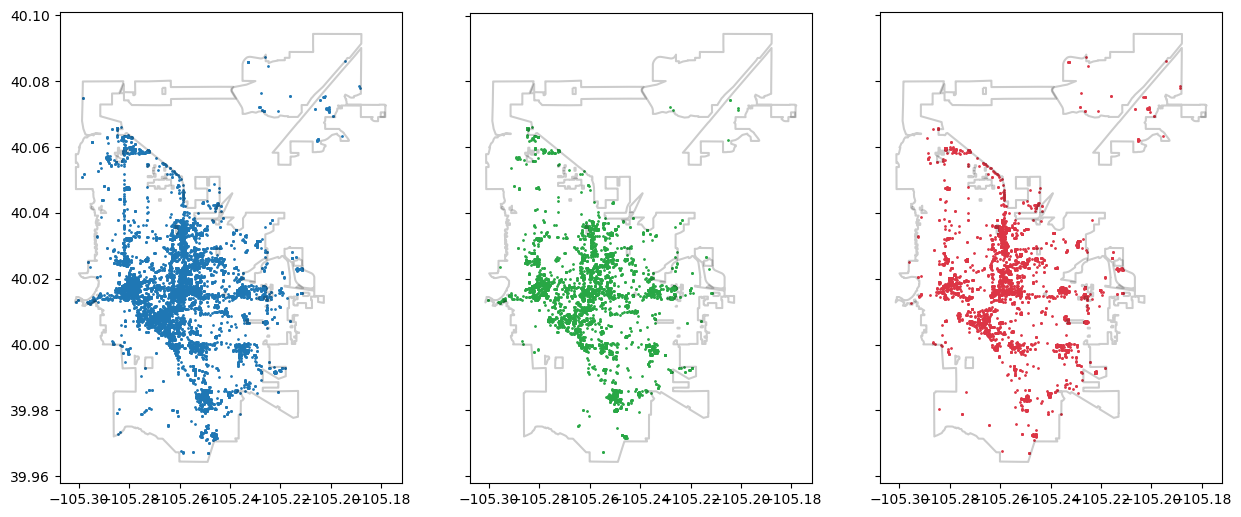

In [15]:
#boulder
bonus_plots(boulder_boundary, all_within_boulder, e_bike_start_or_end_within_boulder, car_like_start_or_end_within_boulder)

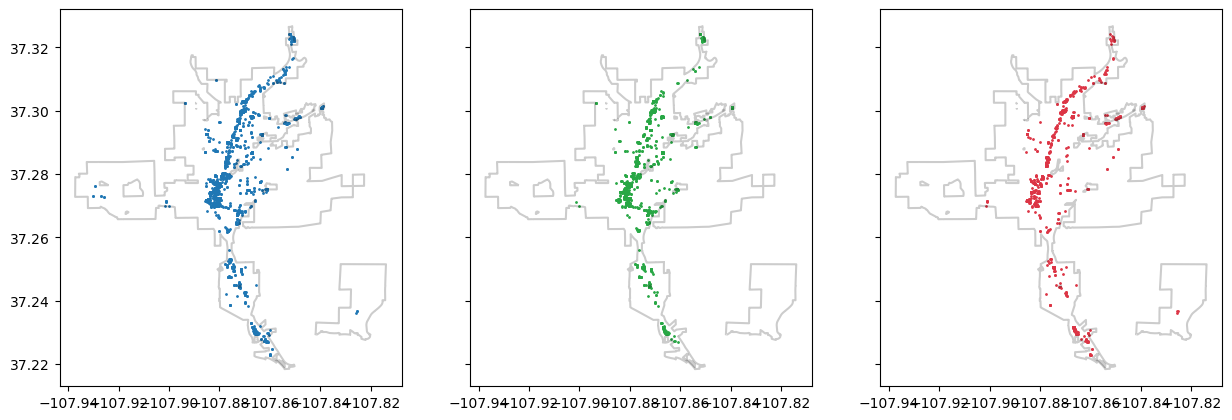

In [16]:
#durango
bonus_plots(durango_boundary, all_within_durango, e_bike_start_or_end_within_durango, car_like_start_or_end_within_durango)

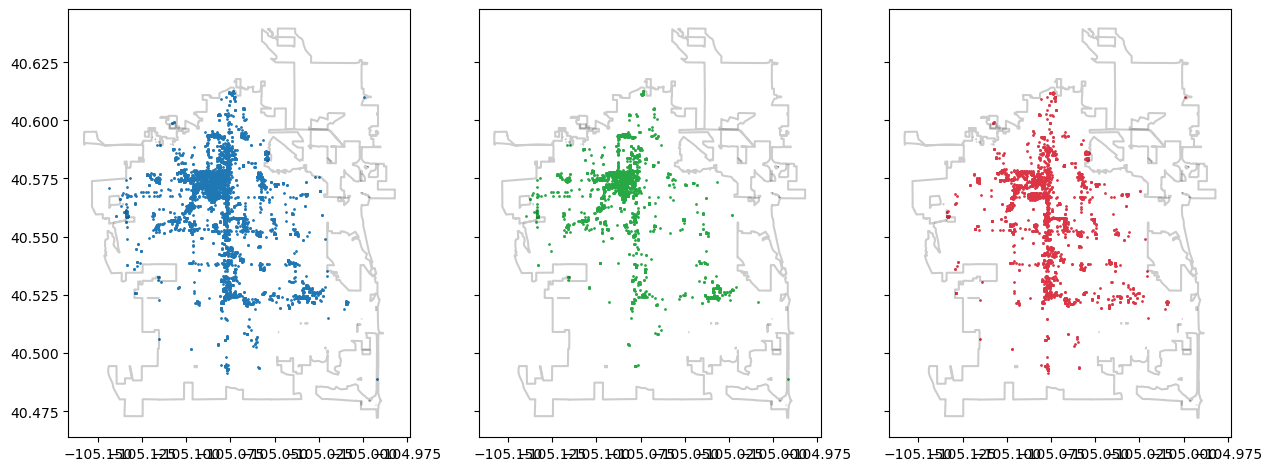

In [17]:
#fort collins
bonus_plots(fort_collins_boundary, all_within_fortcollins, e_bike_start_or_end_within_fortcollins, car_like_start_or_end_within_fortcollins)

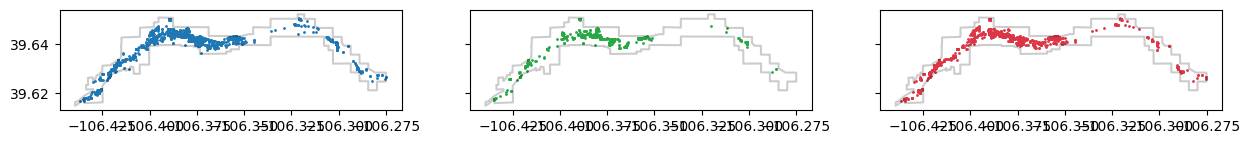

In [18]:
#vail
bonus_plots(vail_boundary, all_within_vail, e_bike_start_or_end_within_vail, car_like_start_or_end_within_vail)

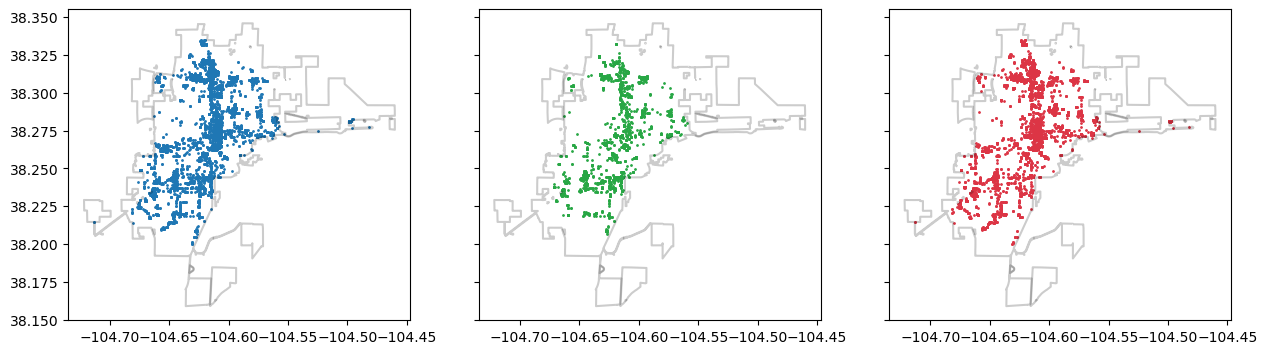

In [19]:
#pueblo
bonus_plots(pueblo_boundary, all_within_pueblo, e_bike_start_or_end_within_pueblo, car_like_start_or_end_within_pueblo)

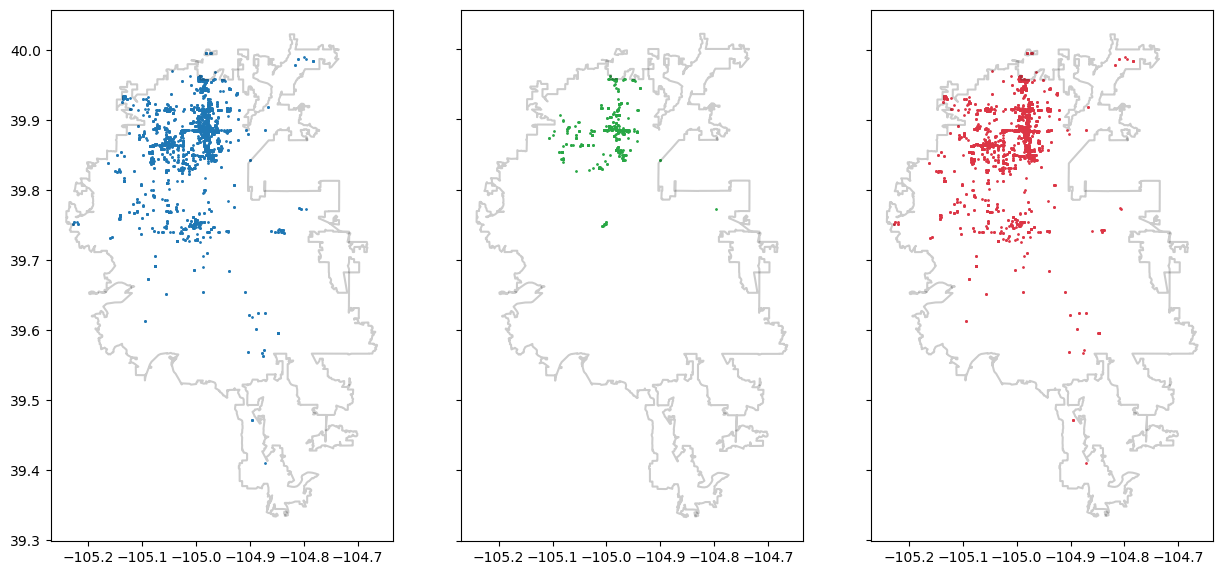

In [20]:
#denver
bonus_plots(denver_boundary, all_sc_within_denver, e_bike_start_or_end_within_denver, car_like_start_or_end_within_denver)

### Preparing for block/pixel analysis

In [21]:
def prepare_blocks_pixels(block_filename, pixel_filename):
    blocks = gpd.read_file(to_boundary_folder + block_filename)
    pixels = gpd.read_file(to_boundary_folder + pixel_filename)
    return blocks, pixels

In [22]:
#read in block and pixel files
denver_blocks, denver_pixels = prepare_blocks_pixels("/denver_blocks.shp", "/denver_pixels_ca.shp")
boulder_blocks, boulder_pixels = prepare_blocks_pixels("/boulder_blocks.shp", "/boulder_pixels.shp")
fort_collins_blocks, fort_collins_pixels = prepare_blocks_pixels("/fort_collins_blocks.shp", "/fortcollins_pixels.shp")
vail_blocks, vail_pixels = prepare_blocks_pixels("/vail_blocks.shp", "/vail_pixels.shp")
durango_blocks, durango_pixels = prepare_blocks_pixels("/durango_blocks.shp", "/durango_pixels.shp")
pueblo_blocks, pueblo_pixels = prepare_blocks_pixels("/pueblo_blocks.shp", "/pueblo_pixels.shp")

### data processing for e-bike : cars ratios [pixels and blocks]

In [23]:
## set up the get counts -- note the "within place" used to pull from -- denver's only inclueds smart commute
def get_counts(pixel_polygon, all_within, all_bikes, all_cars):
    all_trip_count = np.count_nonzero(all_within.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(all_bikes.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(all_cars.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

In [24]:
def get_denver_counts(pixel_polygon):
    return get_counts(pixel_polygon, all_sc_within_denver, e_bike_start_or_end_within_denver, car_like_start_or_end_within_denver)

def get_counts_boulder(pixel_polygon):
    return get_counts(pixel_polygon, all_within_boulder, e_bike_start_or_end_within_boulder, car_like_start_or_end_within_boulder)
    
def get_counts_fortcollins(pixel_polygon):
    return get_counts(pixel_polygon, all_within_fortcollins, e_bike_start_or_end_within_fortcollins, car_like_start_or_end_within_fortcollins)

def get_counts_vail(pixel_polygon):
    return get_counts(pixel_polygon, all_within_vail, e_bike_start_or_end_within_vail, car_like_start_or_end_within_vail)
    
def get_counts_durango(pixel_polygon):
    return get_counts(pixel_polygon, all_within_durango, e_bike_start_or_end_within_durango, car_like_start_or_end_within_durango)
    
def get_counts_pueblo(pixel_polygon):
    return get_counts(pixel_polygon, all_within_pueblo, e_bike_start_or_end_within_pueblo, car_like_start_or_end_within_pueblo)

In [25]:
#get the counts (blocks)
denver_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_blocks.geometry.apply(lambda pp: get_denver_counts(pp))
boulder_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_blocks.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_blocks.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_blocks.geometry.apply(lambda pp: get_counts_vail(pp))
durango_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_blocks.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_blocks.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [26]:
#get the counts (pixels)
denver_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_pixels.geometry.apply(lambda pp: get_denver_counts(pp))
boulder_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_pixels.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_pixels.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_pixels.geometry.apply(lambda pp: get_counts_vail(pp))
durango_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_pixels.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_pixels.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [27]:
def process_ratios(blocks, pixels, area_boundary):
    #get ratio of bikes to cars (blocks)
    blocks["e_bike_2_car_like"] = blocks.e_bike_trip_count / blocks.car_like_trip_count
    #get ratio of bikes to cars (pixels)
    pixels["e_bike_2_car_like"] = pixels.e_bike_trip_count / pixels.car_like_trip_count
    #replacing infinity with max (blocks)
    blocks.replace(np.inf, blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
    #replacing infinity with max (pixels)
    pixels.replace(np.inf, pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
    #calculate where e-bike > car (blocks) -- put in T/F
    blocks["e_bike_better"] = pd.Categorical(blocks.e_bike_2_car_like >= 1)
    #calculate where e-bike is > car (pixels) -- put in T/F
    pixels["e_bike_better"] = pd.Categorical(pixels.e_bike_2_car_like >= 1)
    #remove nan ratios in blocks
    blocks_2 = blocks[blocks['e_bike_2_car_like'].notna()]
    #remove nan ratios in pixels
    pixels_2 = pixels[pixels['e_bike_2_car_like'].notna()]
    
    #make the plot
    ax = area_boundary.boundary.plot()
    pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
    pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))
    
    return blocks_2, pixels_2
    

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


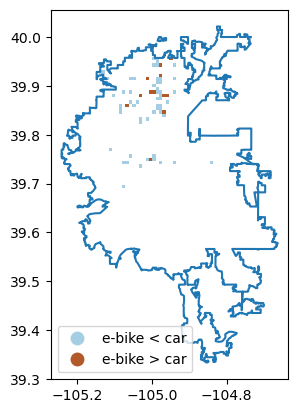

In [28]:
#denver
denver_blocks_2, denver_pixels_2 = process_ratios(denver_blocks, denver_pixels, denver_boundary)

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


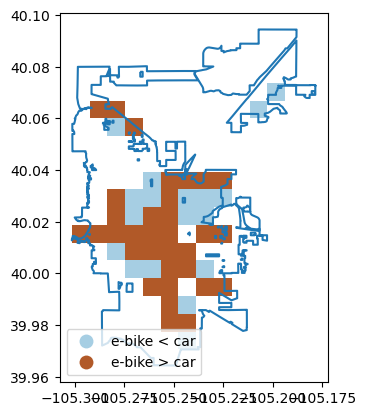

In [29]:
#boulder
boulder_blocks_2, boulder_pixels_2 = process_ratios(boulder_blocks, boulder_pixels, boulder_boundary)

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


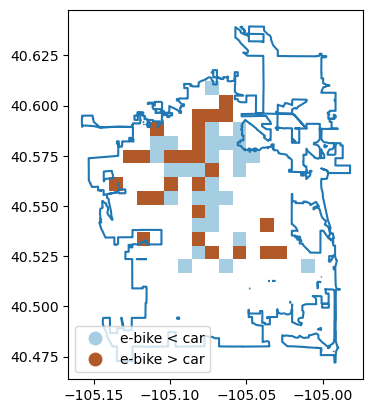

In [30]:
#fort collins
fort_collins_blocks_2, fort_collins_pixels_2 = process_ratios(fort_collins_blocks, fort_collins_pixels, fort_collins_boundary)

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


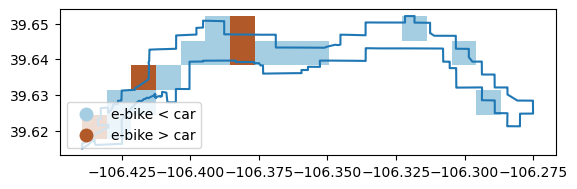

In [31]:
#vail
vail_blocks_2, vail_pixels_2 = process_ratios(vail_blocks, vail_pixels, vail_boundary)

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


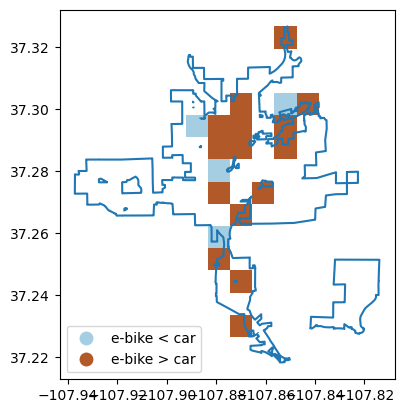

In [32]:
#durango
durango_blocks_2, durango_pixels_2 = process_ratios(durango_blocks, durango_pixels, durango_boundary)

/tmp/ipykernel_71/261373342.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
/tmp/ipykernel_71/261373342.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


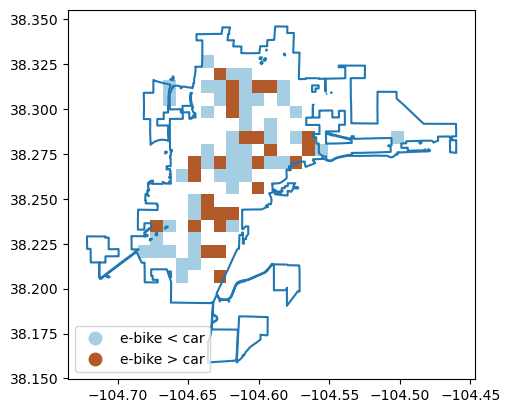

In [33]:
#pueblo
pueblo_blocks_2, pueblo_pixels_2 = process_ratios(pueblo_blocks, pueblo_pixels, pueblo_boundary)

## Draw up the pixel plots

Figure 21

# Pixel Proportions

Figure #22

In [34]:
def orgainze_ratios(pixels, program_name):
    area = pixels.dropna().groupby("e_bike_better").count()
    area[program_name] = area['id'] / sum(area['id'])
    
    return area

In [35]:
denver = orgainze_ratios(denver_pixels_2, 'Smart Commute\n(Denver North)')
boulder = orgainze_ratios(boulder_pixels_2, 'Comunity Cycles\n(Boulder)')
collins = orgainze_ratios(fort_collins_pixels_2,'Fort Collins')
durango = orgainze_ratios(durango_pixels_2, 'Four Corners\n(Durango)')
vail = orgainze_ratios(vail_pixels_2, 'Vail')
pueblo = orgainze_ratios(pueblo_pixels_2,'Pueblo')

/tmp/ipykernel_71/472521573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = pixels.dropna().groupby("e_bike_better").count()
/tmp/ipykernel_71/472521573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = pixels.dropna().groupby("e_bike_better").count()
/tmp/ipykernel_71/472521573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = pixels.dropna().groupby("e_bike_better").count()
/tmp/ipykernel_7

In [36]:
pixels = pd.concat([denver, boulder, collins, durango, vail, pueblo], axis = 1)

pixels = pixels.drop(columns = ['id', 'geometry', 'left', 'top', 'right', 'bottom', 'all_trip_count', 'e_bike_trip_count', 'car_like_trip_count', 'e_bike_2_car_like'])

pixels = pixels.transpose()

#convert to %
pixels['e-bike < car'] = pixels['e-bike < car'] * 100
pixels['e-bike > car'] = pixels['e-bike > car'] * 100

pixels = pixels[['e-bike > car', 'e-bike < car']]

pixels

e_bike_better,e-bike > car,e-bike < car
Smart Commute\n(Denver North),17.391304,82.608696
Comunity Cycles\n(Boulder),64.705882,35.294118
Fort Collins,47.272727,52.727273
Four Corners\n(Durango),78.947368,21.052632
Vail,23.529412,76.470588
Pueblo,35.526316,64.473684


[Text(0, 0, 'Smart Commute\n(Denver North)'),
 Text(1, 0, 'Comunity Cycles\n(Boulder)'),
 Text(2, 0, 'Fort Collins'),
 Text(3, 0, 'Four Corners\n(Durango)'),
 Text(4, 0, 'Vail'),
 Text(5, 0, 'Pueblo')]

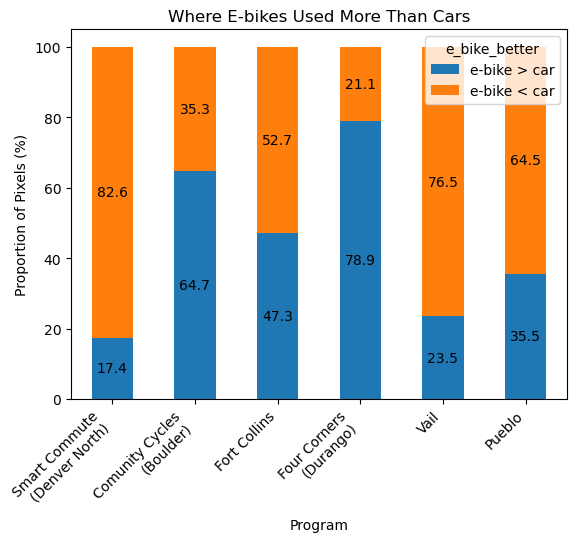

In [37]:
ax = pixels.plot.bar(stacked=True,
                            title="Where E-bikes Used More Than Cars", 
                            ylabel="Proportion of Pixels (%)",
                            xlabel = "Program",)
for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(pixels.index, rotation=45, ha='right')